# Task 2 :Supervised Machine Learning:

## Problem Statement:

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

Now Let's import specific packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Now using pandas for reading a file.

In [2]:
df=pd.read_csv("student_scores.csv")

We will use head function to see first five rows of our dataset.

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Now let's check how many rows and columns our dataset have!

In [4]:
df.shape    #it shows us that our dataset have 25 rows and 2 columns.

(25, 2)

Now we will check the overview information that our dataset contains:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Now we will check unique values in columns:

In [6]:
df['Hours'].unique()   #This are the unique values in 'Hours' column.

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [7]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

Now we will check the datatype of our particular column:

In [8]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

Getting some statistical information related to our data:

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


let's check is there any null values in our dataset or not.

In [10]:
df['Hours'].isnull().sum() # There is no null values in Hours column.

0

In [11]:
df['Scores'].isnull().sum() # our scores column also dont have any null values.

0

In [12]:
df['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

Let's replace 'Hours' to 'Study_hours' as it will be more convienent according to our problem. 

In [13]:
df.rename(columns={'Hours':'Study_hours'},inplace=True)

In [14]:
df.head()

,Study_hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Start with Visualizing the data:

In [15]:
df.isnull().sum()

Study_hours    0
Scores         0
dtype: int64

In [18]:
print(x) #take a look at x

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [19]:
print(y)  #take a look at y

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Countplot:

Shows the count of observations.

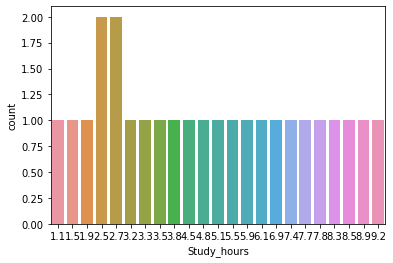

In [20]:
sns.countplot(x='Study_hours',data=df)

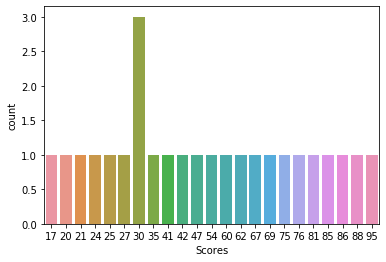

In [21]:
sns.countplot('Scores',data=df)

## Scatterplot:

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

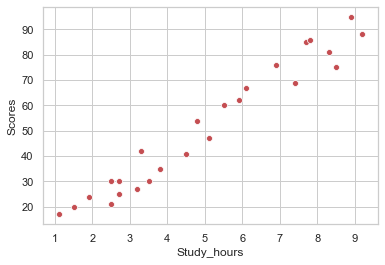

In [22]:
sns.set(style='whitegrid')
sns.scatterplot(x='Study_hours',y='Scores',data=df,markers=False,legend='brief',color='r')

## Pair plot:

Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

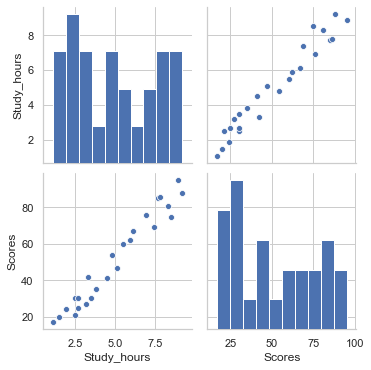

In [23]:
sns.set(style='whitegrid')
sns.pairplot(df)

Here only a positive correlation between the hours of study and the percentage score is clear.

## Box plot:

Box plots plays an important role as it provide us a visual summary of data all the statistical values in terms of graph.

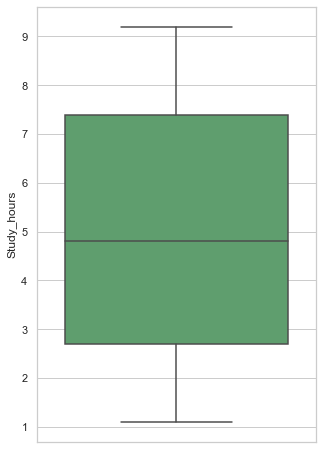

In [24]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Study_hours',data=df,color='g')

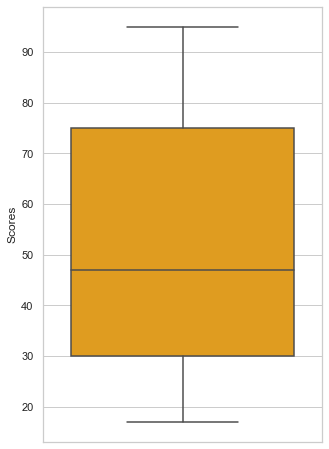

In [25]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Scores',data=df,color='orange')

## Preparing the data:

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [26]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Training the Algorithm:

In [28]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


Plotting the regression line for the test data:

In [29]:
line = regressor.coef_*x+regressor.intercept_
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

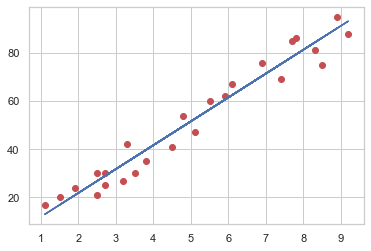

In [30]:
plt.scatter(x, y,color='r')
plt.plot(x, line);
plt.show()

## Making Prediction:

As we already trained our model now it's time to make some prediction.

In [31]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual VS Predicted Score.

In [32]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


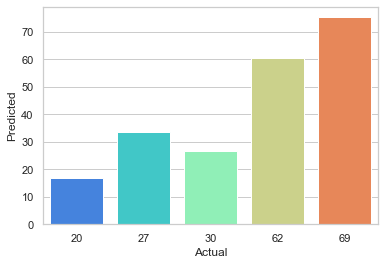

In [33]:
sns.barplot('Actual','Predicted',data=data,palette='rainbow')

Comparing Actual VS predicted data using visualization

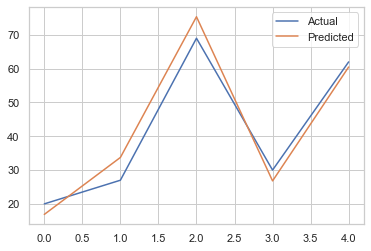

In [37]:
data.plot(kind='line',label='Actual')
plt.legend()

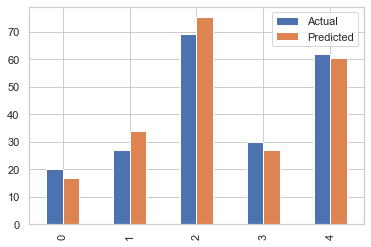

In [41]:
data.plot(kind='bar',label='Actual')

## Now You can also test using your own data:

In [42]:
Study_hours=9.25
own_prediction=regressor.predict([[Study_hours]]).round(2)
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69


## Evaluating the model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error=",MAE)
print("Root Mean Square Error=",RMSE)

Mean Absolute Error= 4.183859899002982
Root Mean Square Error= 4.647447612100373


Hence, our linear regression model works successfully as the difference between MAE and RMSE are velly less means the error size is less.

# Thankyou:)